In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

import random
import numpy as np 
import numpy.matlib as matlib
import matplotlib.pyplot as plt

In [341]:
dataset = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()
train_images = train_images / 256.0
test_images = test_images / 256.0
input_shape=((train_images.shape[1], train_images.shape[2]))

In [342]:
# plot functions
def plot_flat_images(images, dim, items=16, cmap=plt.cm.viridis):
    plt.figure(figsize=(10, np.ceil(items/16)*10))
    for i in range(items):
        plt.subplot(np.ceil(items/4), 4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(dim), cmap)
    plt.show()
    
def plot_vector(vector, cmap=plt.cm.viridis, colorBar=False):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(vector.reshape(1, vector.shape[0]), cmap)
    if colorBar:
        plt.colorbar()

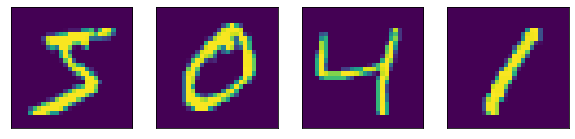

In [343]:
plot_flat_images(train_images, (train_images.shape[1], train_images.shape[2]), 4)

In [354]:
model = tf.keras.Sequential([
#   tf.keras.Input(shape=input_shape),    
    tf.keras.layers.Flatten(input_shape=input_shape, name="inputLayer"),
    tf.keras.layers.Dense(16, activation='relu', name="hiddenLayer"),
    tf.keras.layers.Dense(16, activation='relu', name="hiddenLayer2"),
    tf.keras.layers.Dense(10, name="outputLayer")
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

#    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
#    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    
#    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
#    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    
    metrics=['accuracy']
)
model.summary()

Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer (Dense)          (None, 16)                12560     
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 16)                272       
_________________________________________________________________
outputLayer (Dense)          (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [355]:
epochs=20
history = model.fit(
    train_images, 
    train_labels, 
#    batch_size=10,
    epochs=epochs,
    validation_data=(test_images, test_labels)
)

Epoch 1/20
1875/1875 [==============================] - 1s 623us/step - loss: 0.8253 - accuracy: 0.7378 - val_loss: 0.2600 - val_accuracy: 0.9210
Epoch 2/20
1875/1875 [==============================] - 1s 579us/step - loss: 0.2582 - accuracy: 0.9228 - val_loss: 0.2120 - val_accuracy: 0.9359
Epoch 3/20
1875/1875 [==============================] - 1s 591us/step - loss: 0.2097 - accuracy: 0.9377 - val_loss: 0.1932 - val_accuracy: 0.9402
Epoch 4/20
1875/1875 [==============================] - 1s 583us/step - loss: 0.1866 - accuracy: 0.9441 - val_loss: 0.1739 - val_accuracy: 0.9475
Epoch 5/20
1875/1875 [==============================] - 1s 607us/step - loss: 0.1755 - accuracy: 0.9483 - val_loss: 0.1726 - val_accuracy: 0.9486
Epoch 6/20
1875/1875 [==============================] - 1s 588us/step - loss: 0.1620 - accuracy: 0.9514 - val_loss: 0.1601 - val_accuracy: 0.9527
Epoch 7/20
1875/1875 [==============================] - 1s 598us/step - loss: 0.1511 - accuracy: 0.9556 - val_loss: 0.1681 -

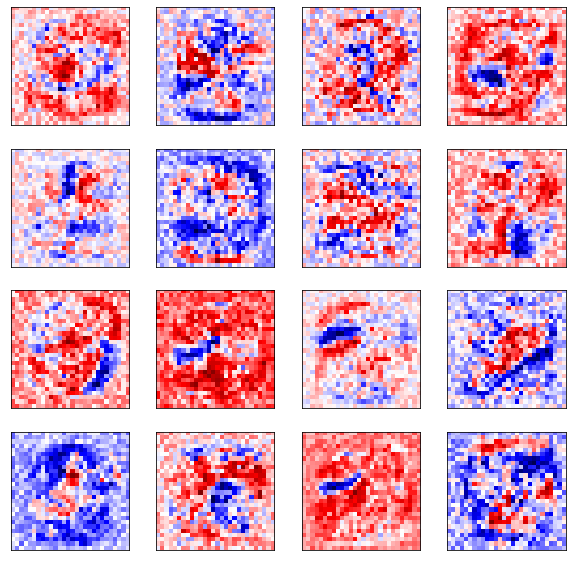

In [356]:
weights = model.get_layer(name="hiddenLayer").get_weights()[0].T
plot_flat_images(weights, (train_images.shape[1], train_images.shape[2]), items=16, cmap=plt.cm.seismic)

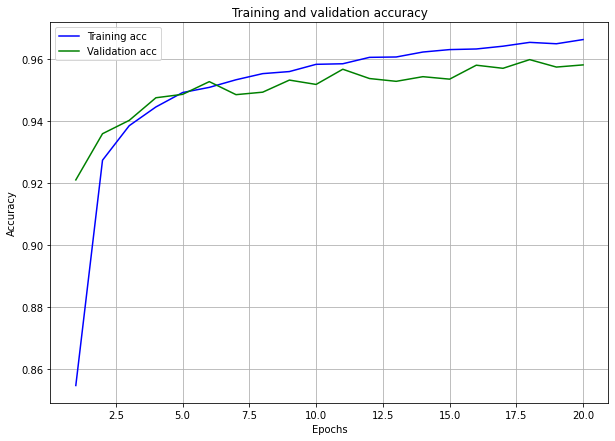

In [357]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10,7))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [358]:
# get the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Set the optimization mode 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Convert and Save the model
open("model_size_optimized.tflite", "wb").write(converter.convert())

INFO:tensorflow:Assets written to: /tmp/tmpkklss3al/assets


INFO:tensorflow:Assets written to: /tmp/tmpkklss3al/assets


16576